In [1]:
%autosave 10

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [2]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
#reading the dataset and storing in dataframe df
df=pd.read_csv('C://Users//Krishna//cleaned_data.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,5003,3047,5000,1000,0,high school,0,1,0,0
26660,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8998,129,0,0,0,high school,0,1,0,0
26661,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,22000,4200,2000,3100,1,university,0,0,0,1
26662,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,1178,1926,52964,1804,1,high school,0,1,0,0


In [8]:
X=df['LIMIT_BAL'].values.reshape(-1,1)
y=df['default payment next month']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [9]:
lr=LogisticRegression()

In [10]:
lr.fit(X_train,y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
lr.fit(X_train,y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [14]:
pred=lr.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
prob=lr.predict_proba(X_test)
prob

array([[0.85704852, 0.14295148],
       [0.83932588, 0.16067412],
       [0.63438464, 0.36561536],
       ...,
       [0.82981782, 0.17018218],
       [0.69563775, 0.30436225],
       [0.85704852, 0.14295148]])

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [16]:
from sklearn.metrics import roc_auc_score,roc_curve,precision_recall_curve

In [17]:
roc_auc_score(y_test,prob[:,1])

0.6170050717511655

_________________________________________________________________________
**Now, plot the ROC curve.**


In [20]:
fpr,tpr,thres=roc_curve(y_test,prob[:,1])

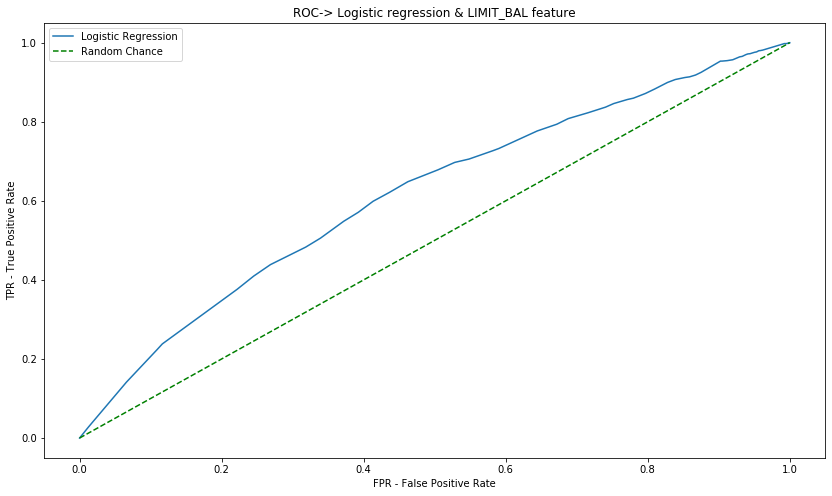

In [22]:
plt.figure(figsize=(14,8))
plt.plot(fpr,tpr,"-")
plt.plot([0,1],[0,1],'g--')

plt.xlabel('FPR - False Positive Rate')
plt.ylabel('TPR - True Positive Rate')
plt.title('ROC-> Logistic regression & LIMIT_BAL feature')
plt.legend(['Logistic Regression','Random Chance'])

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [23]:
from sklearn.metrics import precision_recall_curve,precision_score,precision_recall_fscore_support
precision,recall,thresh1=precision_recall_curve(y_test,prob[:,1])

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


Text(0.5, 1.0, 'Precision and recall Curve - logistic regression & LIMIT_BAL')

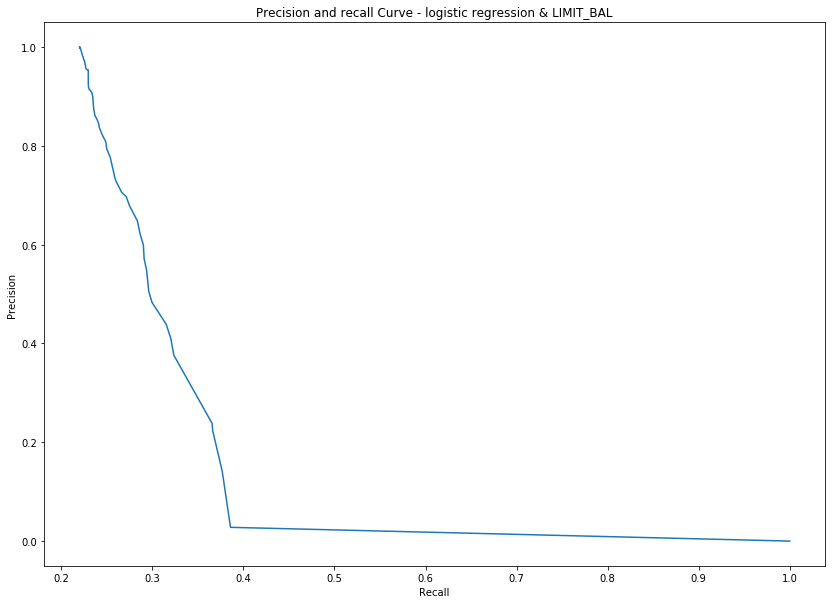

In [24]:
plt.figure(figsize=(14,10))
plt.plot(precision,recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision and recall Curve - logistic regression & LIMIT_BAL')

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [25]:
from sklearn.metrics import auc
auc(recall,precision)

0.3147009000933155

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [27]:
#For Training Data 
xtrain_pred=lr.predict(X_train)
xtrain_pred_proba=lr.predict_proba(X_train)
xtrain_pred_proba

array([[0.58526404, 0.41473596],
       [0.61826474, 0.38173526],
       [0.79861879, 0.20138121],
       ...,
       [0.77554933, 0.22445067],
       [0.75066222, 0.24933778],
       [0.79861879, 0.20138121]])

In [28]:
roc_auc_score(y_train,xtrain_pred_proba[:,1])

0.6193668918916676

    How is this different, conceptually and quantitatively, from your earlier calculation?
